In [81]:
# import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sb
from numpy import median
from scipy import stats
from scipy.stats import randint
import mlxtend


# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

rcParams['figure.figsize'] = (25, 20)

#Stacking
from mlxtend.classifier import StackingClassifier

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [82]:
#Read File from URL
url = "https://raw.githubusercontent.com/FanaOmar/covid19ML/main/covid19ML.csv"
covid_df = pd.read_csv(url, error_bad_lines=False)

In [83]:
#Read 5 top rows
covid_df.head(5)

,No,Age,Gender,Body temperature,Dry Cough,Sore throat,Weakness,Breathing problem,Drowsiness,Pain in chest,...,Diabetes,Heart disease,Lung disease,Stroke or reduced immunity,Symptoms progressed,High blood pressue,Kidney disease,Change in appetide,Loss of sense of smell,RiskLevel
0,1,20,1,98.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,19,1,99.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,55,0,102.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
3,4,40,0,100.0,0,0,0,0,1,1,...,1,0,0,0,1,1,0,1,0,2
4,5,33,1,99.2,0,1,0,1,0,0,...,0,0,1,1,1,0,0,0,1,2


In [84]:
#Read 5 bottom rows
covid_df.tail(5)

,No,Age,Gender,Body temperature,Dry Cough,Sore throat,Weakness,Breathing problem,Drowsiness,Pain in chest,...,Diabetes,Heart disease,Lung disease,Stroke or reduced immunity,Symptoms progressed,High blood pressue,Kidney disease,Change in appetide,Loss of sense of smell,RiskLevel
122,123,37,1,102.0,1,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
123,124,35,0,100.0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,1,0,1
124,125,22,1,99.2,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1
125,126,29,0,102.0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,0
126,127,38,0,101.0,1,1,0,1,1,1,...,1,0,0,0,1,1,0,0,0,2


In [85]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 21 columns):
No                                      127 non-null int64
Age                                     127 non-null int64
Gender                                  127 non-null int64
Body temperature                        127 non-null float64
Dry Cough                               127 non-null int64
Sore throat                             127 non-null int64
Weakness                                127 non-null int64
Breathing problem                       127 non-null int64
Drowsiness                              127 non-null int64
Pain in chest                           127 non-null int64
Travel history to infected countries    127 non-null int64
Diabetes                                127 non-null int64
Heart disease                           127 non-null int64
Lung disease                            127 non-null int64
Stroke or reduced immunity              127 non-null int64
Symptoms

In [86]:
#drop duplicate values if any
covid_df.drop_duplicates()

,No,Age,Gender,Body temperature,Dry Cough,Sore throat,Weakness,Breathing problem,Drowsiness,Pain in chest,...,Diabetes,Heart disease,Lung disease,Stroke or reduced immunity,Symptoms progressed,High blood pressue,Kidney disease,Change in appetide,Loss of sense of smell,RiskLevel
0,1,20,1,98.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,19,1,99.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,55,0,102.0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,1
3,4,40,0,100.0,0,0,0,0,1,1,...,1,0,0,0,1,1,0,1,0,2
4,5,33,1,99.2,0,1,0,1,0,0,...,0,0,1,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,123,37,1,102.0,1,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
123,124,35,0,100.0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,1,0,1
124,125,22,1,99.2,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,1,1
125,126,29,0,102.0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,0


In [87]:
#check for Null value
covid_df.columns[covid_df.isnull().any()]

Index([], dtype='object')

In [88]:
#data spread on numerical value
covid_df.describe()

,No,Age,Gender,Body temperature,Dry Cough,Sore throat,Weakness,Breathing problem,Drowsiness,Pain in chest,...,Diabetes,Heart disease,Lung disease,Stroke or reduced immunity,Symptoms progressed,High blood pressue,Kidney disease,Change in appetide,Loss of sense of smell,RiskLevel
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,...,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,64.000000,36.456693,0.527559,100.031496,0.488189,0.551181,0.409449,0.433071,0.425197,0.370079,...,0.244094,0.094488,0.141732,0.165354,0.480315,0.283465,0.133858,0.401575,0.448819,0.937008
std,36.805797,14.052484,0.501217,1.569536,0.501840,0.499343,0.493680,0.497463,0.496331,0.484738,...,0.431250,0.293665,0.350157,0.372971,0.501591,0.452465,0.341848,0.492158,0.499343,0.675513
min,1.000000,18.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.500000,25.500000,0.000000,98.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,33.000000,1.000000,99.700000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,95.500000,45.000000,1.000000,101.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,127.000000,80.000000,1.000000,103.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [89]:
#Drop unwanted column
covid_df = covid_df.drop(['No', 'Travel history to infected countries', 'Diabetes', 'Heart disease', 'Lung disease',
                  'Stroke or reduced immunity', 'High blood pressue', 'Kidney disease'], axis= 1)
covid_df.isnull().sum().max()
covid_df.head(2)

,Age,Gender,Body temperature,Dry Cough,Sore throat,Weakness,Breathing problem,Drowsiness,Pain in chest,Symptoms progressed,Change in appetide,Loss of sense of smell,RiskLevel
0,20,1,98.6,0,0,0,0,0,0,0,0,0,0
1,19,1,99.0,1,0,0,0,0,0,0,0,0,0


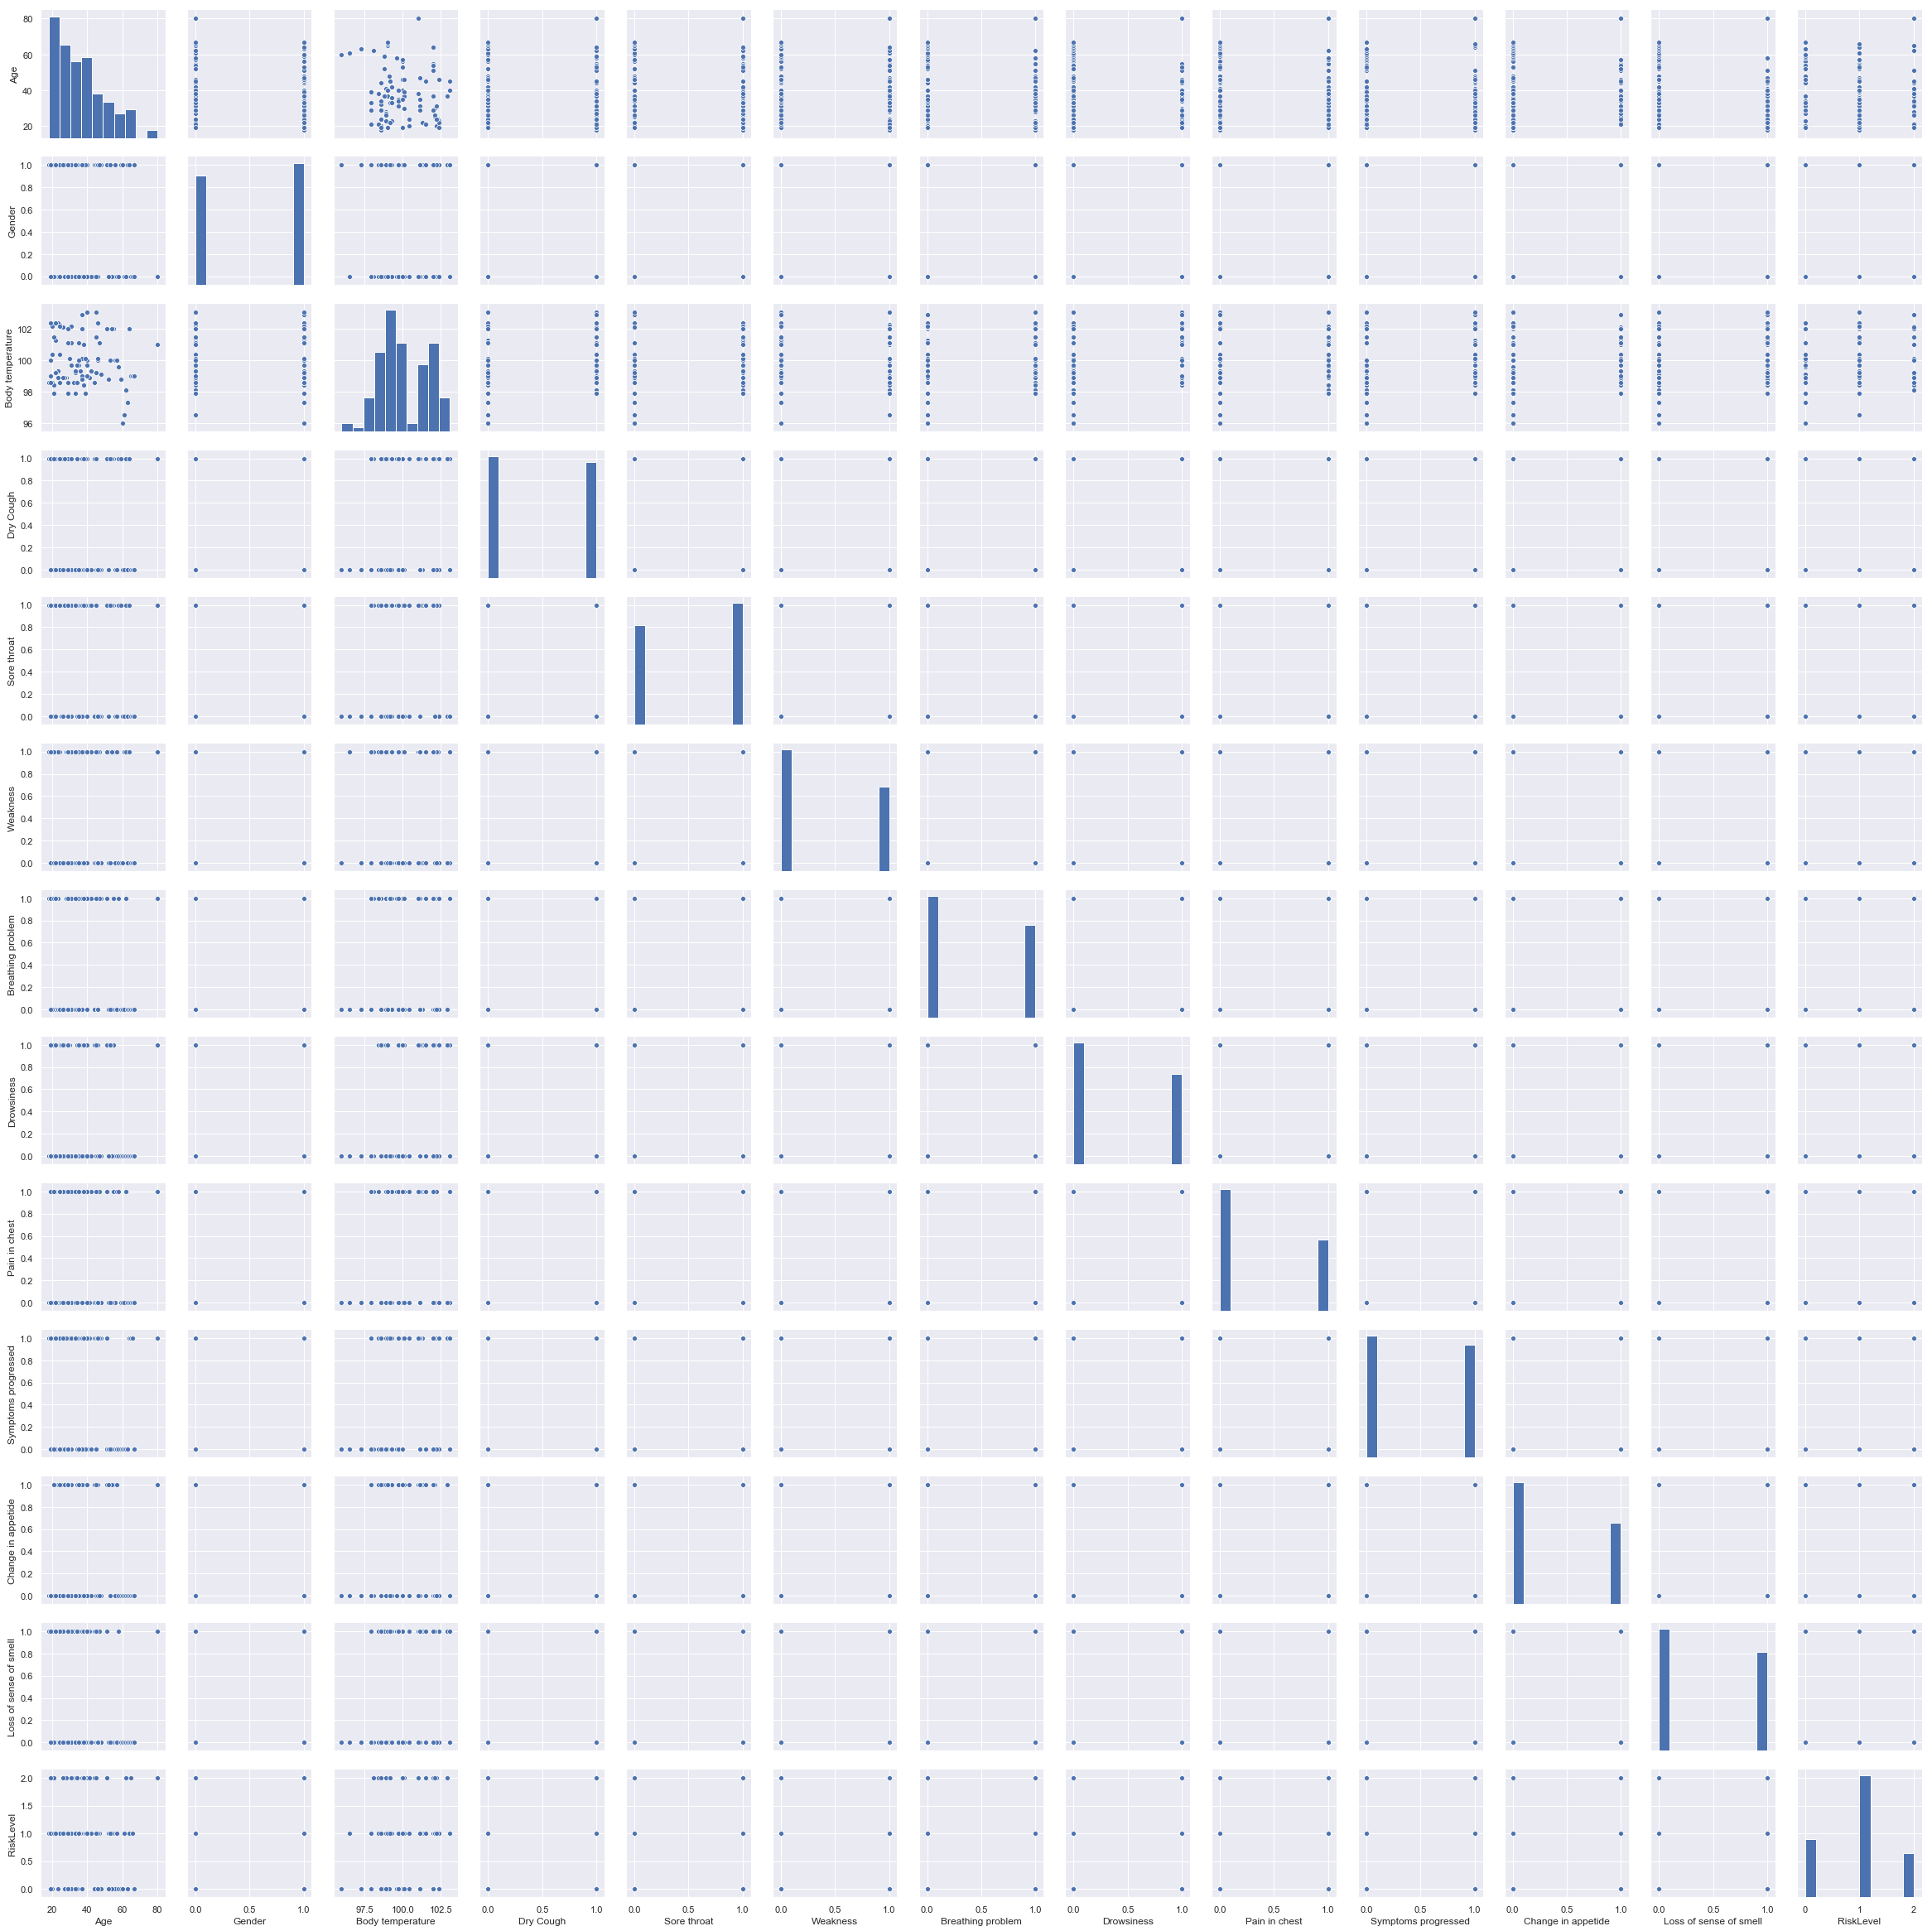

In [90]:
sb.pairplot(covid_df)

In [92]:
#Categorizing Age according to range
covid_df['age_range'] = pd.cut(covid_df['Age'], [0,20,30,65,80], labels=["0-20", "21-30", "31-65", "66-80"], include_lowest=True)
covid_df

,Age,Gender,Body temperature,Dry Cough,Sore throat,Weakness,Breathing problem,Drowsiness,Pain in chest,Symptoms progressed,Change in appetide,Loss of sense of smell,RiskLevel,age_range
0,20,1,98.6,0,0,0,0,0,0,0,0,0,0,0-20
1,19,1,99.0,1,0,0,0,0,0,0,0,0,0,0-20
2,55,0,102.0,1,1,1,1,1,1,0,1,0,1,31-65
3,40,0,100.0,0,0,0,0,1,1,1,1,0,2,31-65
4,33,1,99.2,0,1,0,1,0,0,1,0,1,2,31-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,37,1,102.0,1,1,1,1,0,0,1,1,0,0,31-65
123,35,0,100.0,0,0,0,0,1,1,0,1,0,1,31-65
124,22,1,99.2,0,0,0,1,0,0,1,0,1,1,21-30
125,29,0,102.0,0,1,1,1,1,1,0,1,1,0,21-30


In [93]:
for col in covid_df.columns:
    print('-' * 20 + col + '-' * 20 , end=' - ')
    display(covid_df[col].value_counts().head(10))

--------------------Age-------------------- - 

29    8
40    7
24    6
37    6
31    6
19    5
20    5
33    5
21    4
22    4
Name: Age, dtype: int64

--------------------Gender-------------------- - 

1    67
0    60
Name: Gender, dtype: int64

--------------------Body temperature-------------------- - 

98.6     13
100.0    11
98.9     10
99.0      9
101.1     8
102.0     8
97.9      7
102.1     6
100.1     5
99.3      5
Name: Body temperature, dtype: int64

--------------------Dry Cough-------------------- - 

0    65
1    62
Name: Dry Cough, dtype: int64

--------------------Sore throat-------------------- - 

1    70
0    57
Name: Sore throat, dtype: int64

--------------------Weakness-------------------- - 

0    75
1    52
Name: Weakness, dtype: int64

--------------------Breathing problem-------------------- - 

0    72
1    55
Name: Breathing problem, dtype: int64

--------------------Drowsiness-------------------- - 

0    73
1    54
Name: Drowsiness, dtype: int64

--------------------Pain in chest-------------------- - 

0    80
1    47
Name: Pain in chest, dtype: int64

--------------------Symptoms progressed-------------------- - 

0    66
1    61
Name: Symptoms progressed, dtype: int64

--------------------Change in appetide-------------------- - 

0    76
1    51
Name: Change in appetide, dtype: int64

--------------------Loss of sense of smell-------------------- - 

0    70
1    57
Name: Loss of sense of smell, dtype: int64

--------------------RiskLevel-------------------- - 

1    69
0    33
2    25
Name: RiskLevel, dtype: int64

--------------------age_range-------------------- - 

31-65    69
21-30    41
0-20     12
66-80     5
Name: age_range, dtype: int64

Data Encoding

In [94]:
lb_make = preprocessing.LabelEncoder()

In [95]:
df_col = covid_df[['Age', 'Gender', 'Body temperature','Dry Cough', 'Sore throat', 'Weakness', 'Breathing problem',
                  'Drowsiness','Pain in chest','Symptoms progressed', 
                  'Change in appetide', 'Loss of sense of smell', 'RiskLevel', 'age_range']] 

In [96]:
labelDict = {}
for feature in covid_df:
    le = preprocessing.LabelEncoder()
    le.fit(covid_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    covid_df[feature] = le.transform(covid_df[feature])

 # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 80]
label_Gender [0, 1]
label_Body temperature [96.0, 96.5, 97.3, 97.9, 98.1, 98.4, 98.6, 98.8, 98.9, 99.0, 99.1, 99.2, 99.3, 99.6, 99.7, 100.0, 100.1, 100.4, 101.0, 101.1, 101.3, 101.5, 102.0, 102.1, 102.2, 102.3, 102.4, 102.9, 103.1]
label_Dry Cough [0, 1]
label_Sore throat [0, 1]
label_Weakness [0, 1]
label_Breathing problem [0, 1]
label_Drowsiness [0, 1]
label_Pain in chest [0, 1]
label_Symptoms progressed [0, 1]
label_Change in appetide [0, 1]
label_Loss of sense of smell [0, 1]
label_RiskLevel [0, 1, 2]
label_age_range ['0-20', '21-30', '31-65', '66-80']


Covariance Matrix

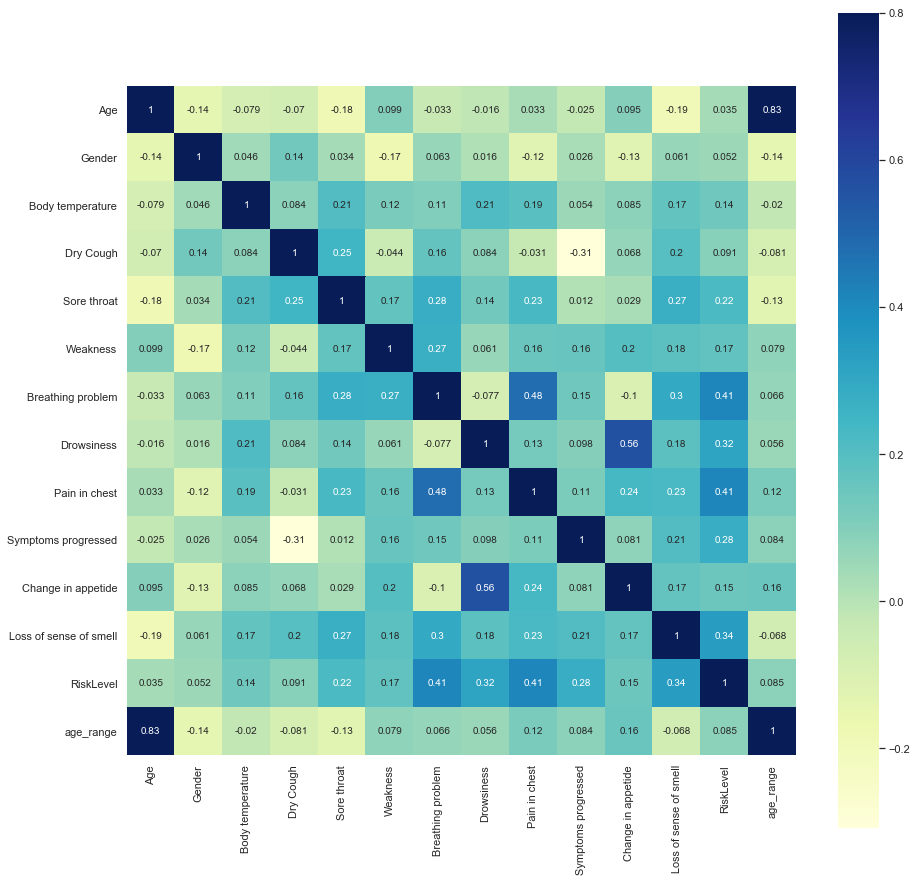

In [97]:
#Summary of the relationship between variables
corrmat = covid_df.corr()
fig, axe = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="YlGnBu", annot = True);
plt.show()

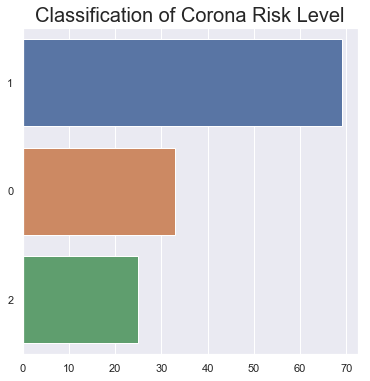

In [98]:
plt.figure(figsize=(6, 6))
sns.countplot(y='RiskLevel', order = covid_df['RiskLevel'].value_counts().index, data=covid_df)
plt.title('Classification of Corona Risk Level', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

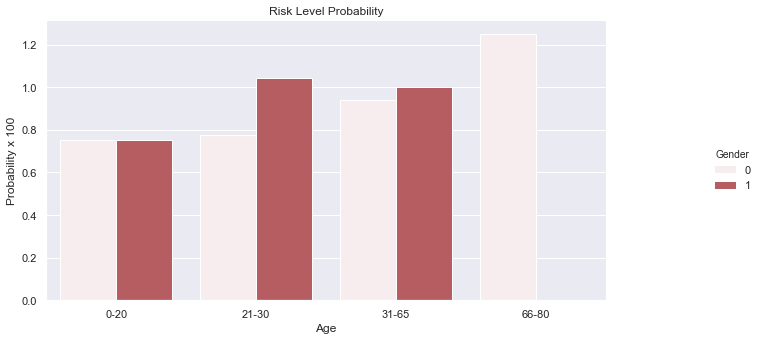

In [101]:
o = labelDict['label_age_range']

g = sns.factorplot(x="age_range", y="RiskLevel", hue="Gender", data=covid_df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True, color='r')
g.set_xticklabels(o)

plt.title('Risk Level Probability')
plt.ylabel('Probability x 100')
plt.xlabel('Age')
# replace legend labels

new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

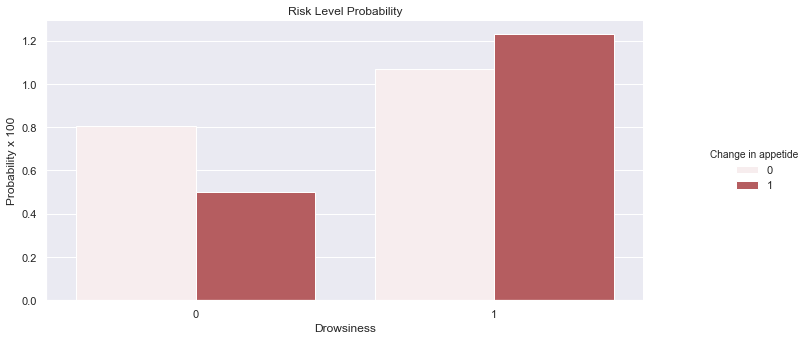

In [102]:
o = labelDict['label_Drowsiness']

g = sns.factorplot(x="Drowsiness", y="RiskLevel", hue="Change in appetide", data=covid_df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True, color='r')
g.set_xticklabels(o)

plt.title('Risk Level Probability')
plt.ylabel('Probability x 100')
plt.xlabel('Drowsiness')
# replace legend labels

new_labels = labelDict['label_Change in appetide']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

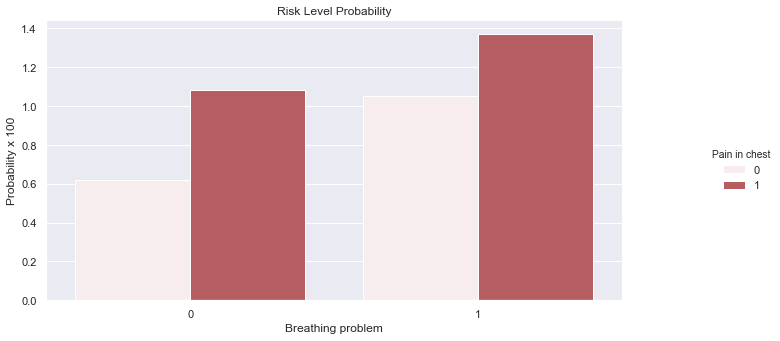

In [103]:
o = labelDict['label_Breathing problem']

g = sns.factorplot(x="Breathing problem", y="RiskLevel", hue="Pain in chest", data=covid_df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True, color='r')
g.set_xticklabels(o)

plt.title('Risk Level Probability')
plt.ylabel('Probability x 100')
plt.xlabel('Breathing problem')
# replace legend labels

new_labels = labelDict['label_Pain in chest']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

In [104]:
# Scaling Age as it different from other
scaler = MinMaxScaler()
covid_df['Age'] = scaler.fit_transform(covid_df[['Age']])
covid_df.head()

,Age,Gender,Body temperature,Dry Cough,Sore throat,Weakness,Breathing problem,Drowsiness,Pain in chest,Symptoms progressed,Change in appetide,Loss of sense of smell,RiskLevel,age_range
0,0.042553,1,6,0,0,0,0,0,0,0,0,0,0,0
1,0.021277,1,9,1,0,0,0,0,0,0,0,0,0,0
2,0.723404,0,22,1,1,1,1,1,1,0,1,0,1,2
3,0.468085,0,15,0,0,0,0,1,1,1,1,0,2,2
4,0.319149,1,11,0,1,0,1,0,0,1,0,1,2,2


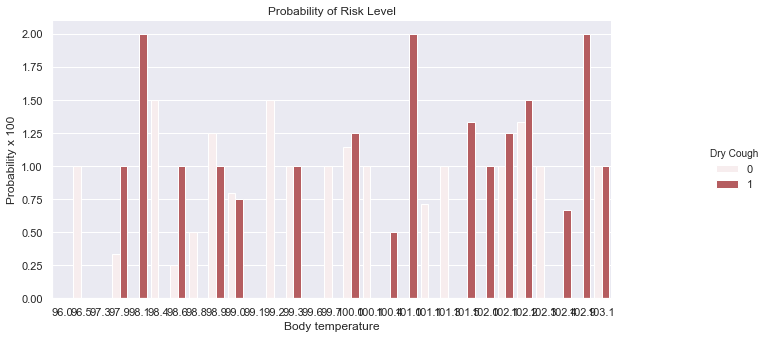

In [129]:
o = labelDict['label_Body temperature']

g = sns.factorplot(x="Body temperature", y="RiskLevel", hue="Dry Cough", data=covid_df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True, color='r')
g.set_xticklabels(o)

plt.title('Probability of Risk Level')
plt.ylabel('Probability x 100')
plt.xlabel('Body temperature')
# replace legend labels

new_labels = labelDict['label_Dry Cough']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

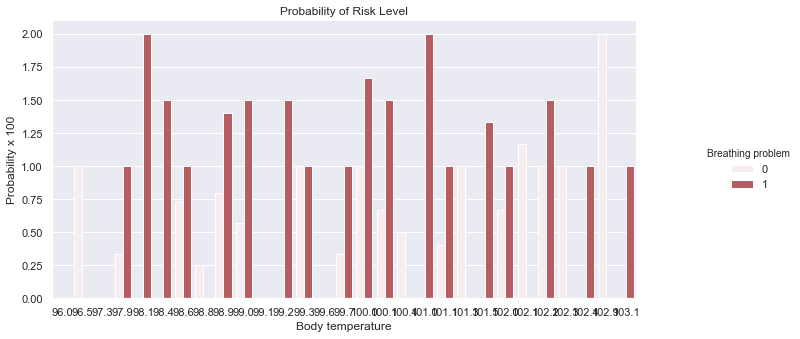

In [130]:
o = labelDict['label_Body temperature']

g = sns.factorplot(x="Body temperature", y="RiskLevel", hue="Breathing problem", data=covid_df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True, color='r')
g.set_xticklabels(o)

plt.title('Probability of Risk Level')
plt.ylabel('Probability x 100')
plt.xlabel('Body temperature')
# replace legend labels

new_labels = labelDict['label_Breathing problem']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

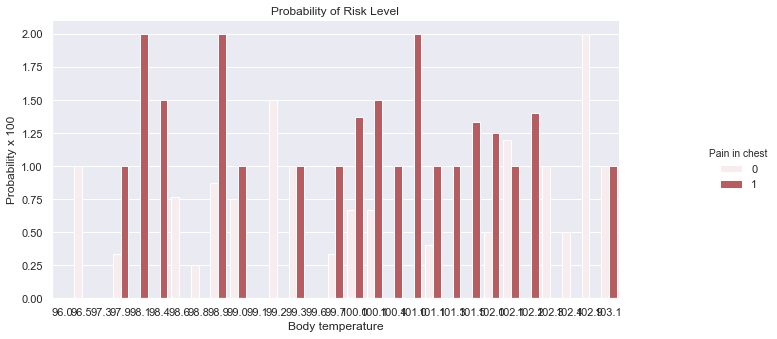

In [131]:
o = labelDict['label_Body temperature']

g = sns.factorplot(x="Body temperature", y="RiskLevel", hue="Pain in chest", data=covid_df, kind="bar",  ci=None, size=5, aspect=2, legend_out = True, color='r')
g.set_xticklabels(o)

plt.title('Probability of Risk Level')
plt.ylabel('Probability x 100')
plt.xlabel('Body temperature')
# replace legend labels

new_labels = labelDict['label_Pain in chest']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

In [105]:
# define X and y
selected_cols = ['Age', 'Gender', 'Body temperature','Dry Cough', 'Sore throat', 'Weakness', 'Breathing problem',
                  'Drowsiness','Pain in chest','Symptoms progressed', 
                  'Change in appetide', 'Loss of sense of smell']
X = covid_df[selected_cols]
Y = covid_df.RiskLevel

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=1) 

1. feature 0 (0.172627)
2. feature 2 (0.119285)
3. feature 7 (0.115853)
4. feature 1 (0.108634)
5. feature 8 (0.086541)
6. feature 6 (0.073600)
7. feature 11 (0.061975)
8. feature 9 (0.059620)
9. feature 4 (0.057890)
10. feature 5 (0.057705)
11. feature 3 (0.053720)
12. feature 10 (0.032550)


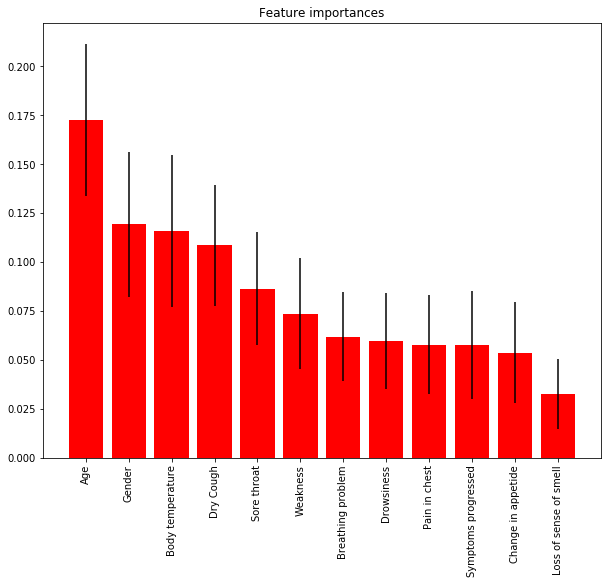

In [36]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(selected_cols[f])
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure(figsize=(10,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [106]:
# Calculating the best parameters
tree = DecisionTreeClassifier()

In [107]:
# train a decision tree model on the training set
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
y_pred = tree.predict(X_test) 
print("Predicted values:") 
print(y_pred)

Predicted values:
[1 1 1 1 1 0 0 2 1 1 1 1 2 1 1 2 0 1 1 2 1 1 1 1 1 0 1 1 0 1 2 0 1 2 0 0 1
 0 1]


In [109]:
print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 

Confusion Matrix:  [[ 7  2  1]
 [ 1 16  5]
 [ 1  6  0]]


In [110]:
print ("Accuracy : ", 
    accuracy_score(y_test,y_pred))

Accuracy :  0.5897435897435898


In [111]:
print("Report : ", 
    classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.67      0.73      0.70        22
           2       0.00      0.00      0.00         7

    accuracy                           0.59        39
   macro avg       0.48      0.48      0.48        39
weighted avg       0.58      0.59      0.58        39



In [ ]:
Logistic Regression

In [112]:
sns.set()
#Logistic Regression
from sklearn.datasets import make_classification

In [113]:
# define X and y for LR
selected_cols = ['Age', 'Gender', 'Body temperature','Dry Cough', 'Sore throat', 'Weakness', 'Breathing problem',
                  'Drowsiness','Pain in chest','Symptoms progressed', 
                  'Change in appetide', 'Loss of sense of smell']
X = covid_df[selected_cols]
Y = covid_df.RiskLevel

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=1) 

In [114]:
#trying logistic regression different way
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
y_predicted = model.predict(X_test)
print('Logistic Regression result')
model.score(X_test,y_test)

Logistic Regression result


0.6410256410256411

In [116]:
print('co-effecient:')
print(model.coef_)
print('intercept:')
print(model.intercept_)

co-effecient:
[[-0.28239724 -0.08775389  0.00335636  0.13283034 -0.03799016 -0.5113072
  -0.64593898 -1.36164306 -1.02172997 -0.7354553  -0.06797871 -0.40214627]
 [-0.96632412  0.11562941  0.01890294 -0.15007349 -0.5051274   0.64581864
  -0.14823213  0.39577463  0.41426839 -0.10099067 -0.24747086 -0.02234357]
 [ 1.24872136 -0.02787552 -0.0222593   0.01724316  0.54311756 -0.13451144
   0.79417111  0.96586843  0.60746159  0.83644597  0.31544957  0.42448984]]
intercept:
[ 1.5820253   1.01444609 -2.5964714 ]


In [ ]:
Random Forest

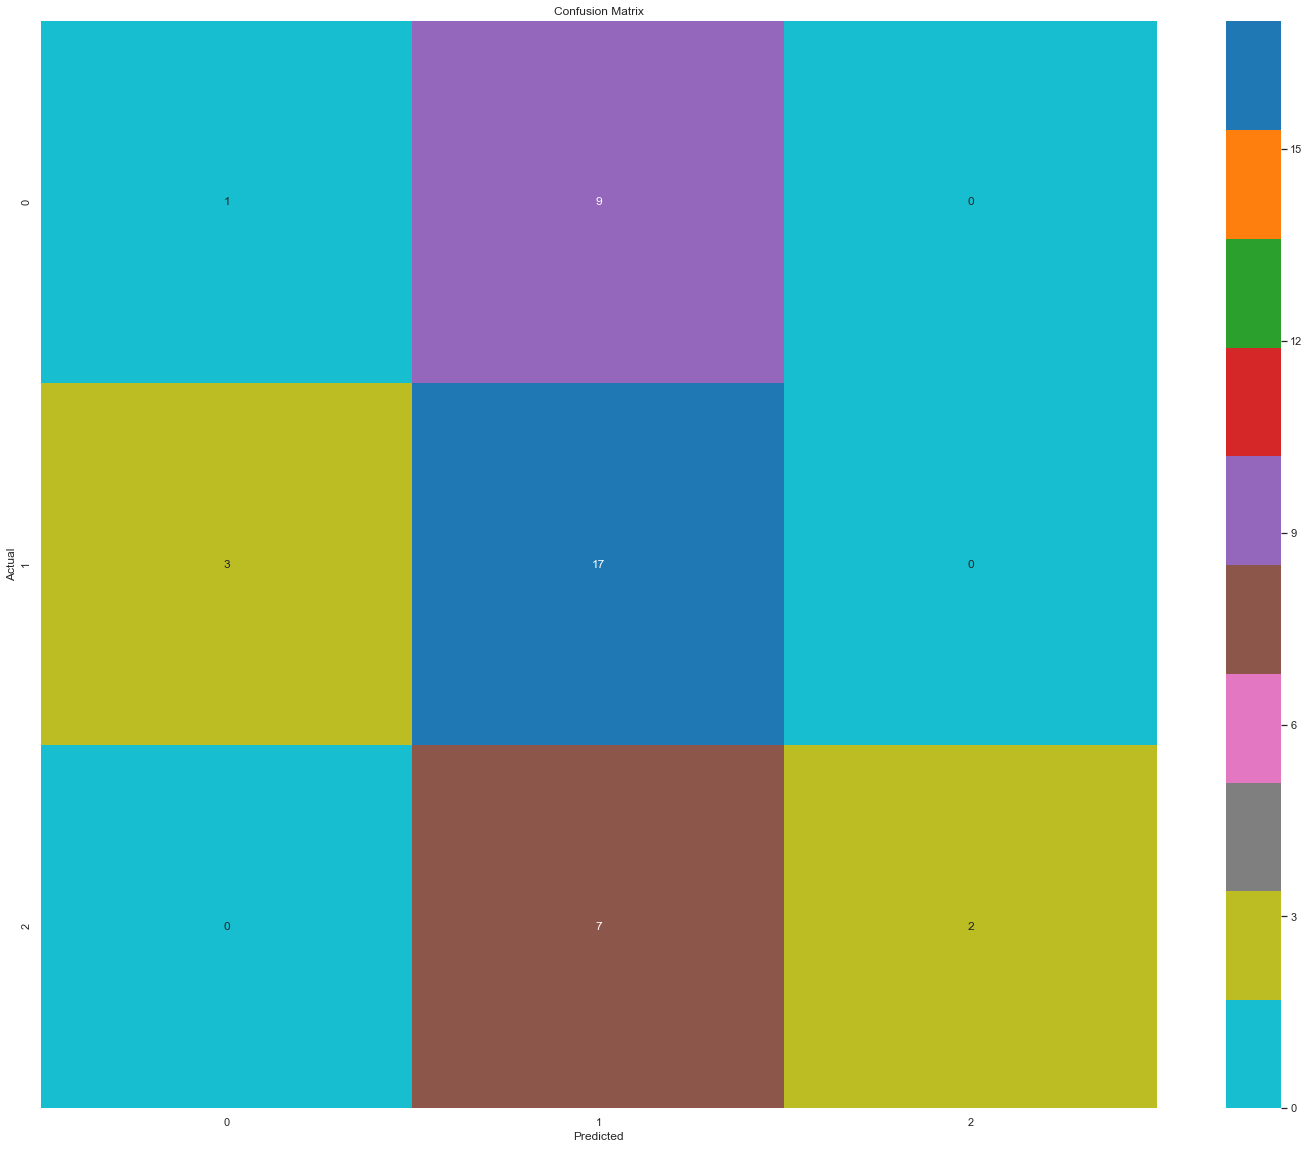

accuracy:
0.5128205128205128


In [126]:
confusion = metrics.confusion_matrix(y_test, y_predicted)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
# visualize Confusion Matrix
sns.heatmap(confusion,annot=True,fmt="d",cmap="tab10_r") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = metrics.accuracy_score(y_test, y_predicted)
print('accuracy:')
print(accuracy)

In [119]:
from sklearn import datasets

In [120]:
# defining X and Y
xVar = ['Age', 'Gender', 'Body temperature','Dry Cough', 'Sore throat', 'Weakness', 'Breathing problem',
                  'Drowsiness','Pain in chest','Symptoms progressed', 
                  'Change in appetide', 'Loss of sense of smell']
X = covid_df[xVar]
Y = covid_df.RiskLevel

In [121]:
# defining training and testing sets where 30% of variables are for testing models
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [122]:
##print train and test group shape
print ('Train group shape:', X_train.shape, y_train.shape)
print ('Test group shape:', X_test.shape, y_test.shape)

Train group shape: (88, 12) (88,)
Test group shape: (39, 12) (39,)


In [123]:
#defining RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=1e-07,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [127]:
#Actual vs predicted result
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1,2
Actual Result,,,
0,4,4,2
1,2,16,2
2,0,7,2


In [128]:
##feature important for list
list(zip(X_train, clf.feature_importances_))

[('Age', 0.22681875676102073),
 ('Gender', 0.07695009400642779),
 ('Body temperature', 0.14385157176870414),
 ('Dry Cough', 0.05029343252585155),
 ('Sore throat', 0.0550619329858588),
 ('Weakness', 0.052507515051639496),
 ('Breathing problem', 0.07474529839878487),
 ('Drowsiness', 0.09057683915400082),
 ('Pain in chest', 0.07919464042568287),
 ('Symptoms progressed', 0.04757997891651124),
 ('Change in appetide', 0.03741927348290635),
 ('Loss of sense of smell', 0.06500066652261141)]